# 1 Data visualization and analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib notebook

df = pd.read_csv('enriched_table.csv')
display(df.head())

,id_order,title,editor,year_month,order_total_paid,product_name,product_url_img
0,97337926,Tinder,Tinder Inc.,2020-06,6.99,1 boost,https://is5-ssl.mzstatic.com/image/thumb/Purpl...
1,97518205,Tinder,Tinder Inc.,2020-06,27.99,5 boosts,https://is5-ssl.mzstatic.com/image/thumb/Purpl...
2,97424538,Tinder,Tinder Inc.,2020-06,16.49,tinder gold,https://is5-ssl.mzstatic.com/image/thumb/Purpl...
3,99165099,Tinder,Tinder Inc.,2020-06,7.49,tinder gold,https://is5-ssl.mzstatic.com/image/thumb/Purpl...
4,110834238,Tinder,Tinder Inc.,2020-06,32.99,tinder gold,https://is5-ssl.mzstatic.com/image/thumb/Purpl...


In [513]:
df = df.drop(['id_order','product_url_img'], axis=1)
display(df.head())

,title,editor,year_month,order_total_paid,product_name
0,Tinder,Tinder Inc.,2020-06,6.99,1 boost
1,Tinder,Tinder Inc.,2020-06,27.99,5 boosts
2,Tinder,Tinder Inc.,2020-06,16.49,tinder gold
3,Tinder,Tinder Inc.,2020-06,7.49,tinder gold
4,Tinder,Tinder Inc.,2020-06,32.99,tinder gold


In [514]:
#from datetime import date

df['year'] = pd.to_datetime(df['year_month']).dt.year
df['month'] = pd.to_datetime(df['year_month']).dt.month

display(df.head())

,title,editor,year_month,order_total_paid,product_name,year,month
0,Tinder,Tinder Inc.,2020-06,6.99,1 boost,2020,6
1,Tinder,Tinder Inc.,2020-06,27.99,5 boosts,2020,6
2,Tinder,Tinder Inc.,2020-06,16.49,tinder gold,2020,6
3,Tinder,Tinder Inc.,2020-06,7.49,tinder gold,2020,6
4,Tinder,Tinder Inc.,2020-06,32.99,tinder gold,2020,6


In [515]:
#Total profit by company

df_total_profit = df.groupby(['editor','title','year']).agg({'order_total_paid': ['sum']})
df_total_profit = df_total_profit.reset_index()

display(df_total_profit.head())

#reordering companies rows display by industry: streaming, dating and games
df_total_profit = df_total_profit.reindex([0, 3, 1, 8, 2, 4, 5, 6, 7]) 
df_total_profit = df_total_profit.reset_index(drop = True)

display(df_total_profit)

,editor,title,year,order_total_paid
,,,,sum
0,Disney,Disney+,2020,48688.11
1,GROUPE CANAL+,myCANAL,2020,25529.32
2,King,Candy Crush Saga,2020,8270.87
3,"Netflix, Inc.",Netflix,2020,89270.38
4,Playrix,Homescapes,2020,7152.80


,editor,title,year,order_total_paid
,,,,sum
0,Disney,Disney+,2020,48688.11
1,"Netflix, Inc.",Netflix,2020,89270.38
2,GROUPE CANAL+,myCANAL,2020,25529.32
3,Tinder Inc.,Tinder,2020,51682.99
4,King,Candy Crush Saga,2020,8270.87
5,Playrix,Homescapes,2020,7152.80
6,Supercell,Brawl Stars,2020,30871.88
7,Supercell,Clash Royale,2020,17132.67
8,Supercell,Clash of Clans,2020,34591.71


In [516]:
#Changing default font of matplotlib to Serif Georgia
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.serif'] = ['Georgia']

#Creating matplotlib objects fig and ax
fig, ax = plt.subplots(figsize = (6, 6))

height = df_total_profit['order_total_paid','sum']
bars = tuple(df_total_profit['title'])
ax.set_title('Accumulated profit by app from January to September 2020', fontsize=15, pad=6)

#Choosing settings to barplot graphic
ax.bar(bars, height, color = ['cornflowerblue','thistle','silver','indianred','darkseagreen','darkcyan','darkkhaki','rosybrown','darkslateblue'],
       edgecolor = 'darkgrey', alpha = 0.8)

#Choosing settings for labels, axis and grid

x_pos = np.arange(start = 10000, step = 15000, stop = 100000)
plt.xticks(bars, color = 'black', rotation = 25, fontsize = '10')
plt.yticks(ticks = x_pos, color = 'black', fontsize = '12') #x_pos,
plt.grid(axis = 'y', color = 'darkgrey', ls='dashed')

ax.yaxis.set_major_formatter('${x:1.0f}')
plt.ylabel('Accumulated profit', color = 'black', fontsize = '10', labelpad = 2)
plt.subplots_adjust(bottom = 0.15) 

plt.show()
plt.savefig('graphics/acumulated profit 2020.png')

<IPython.core.display.Javascript object>

In [517]:
#Monthly profit from each company 

df_monthly_revenue = df.groupby(['title','year','month']).agg({'order_total_paid': ['sum']})
df_monthly_revenue = df_monthly_revenue.reset_index()
display(df_monthly_revenue.head())

,title,year,month,order_total_paid
,,,,sum
0,Brawl Stars,2020,1,1153.86
1,Brawl Stars,2020,2,2653.07
2,Brawl Stars,2020,3,4523.50
3,Brawl Stars,2020,4,2870.14
4,Brawl Stars,2020,5,1981.52


In [518]:
#The function plot_monthly_revenue plot each subplot of the monthly revenue by company
#inputs: product_name: company name in the 'title' column
#line_color: color for linegraph
#df_monthly_revenue: dataframe wtih total profit per month by company
#index: integer index for the 3x3 subplot, must be between 1 and 9

def plot_monthly_revenue(product_name, line_color, df_monthly_revenue, index):
    
    revenue = df_monthly_revenue[(df_monthly_revenue['title'] == product_name)]['order_total_paid','sum']
    months = ['Jan.','Feb.','Mar.','April','May','June','July','Aug.','Sept.']

    ax = plt.subplot(3, 3, index)
    if(product_name == 'Disney+'):
        plt.plot(months[3:], revenue, line_color, linewidth=2, marker='.', markersize=7)
    else:      
        plt.plot(months, revenue, line_color, linewidth=2, marker='.', markersize=7)
    plt.axhline(y=np.mean(revenue), color=line_color, linestyle='--')  
    plt.title(product_name, fontsize=10)
    plt.xticks(color = 'black', rotation = 30, fontsize = '8')
    ax.yaxis.set_major_formatter('${x:1.0f}')
    plt.grid(color = 'darkgrey', ls='dashed')

<IPython.core.display.Javascript object>


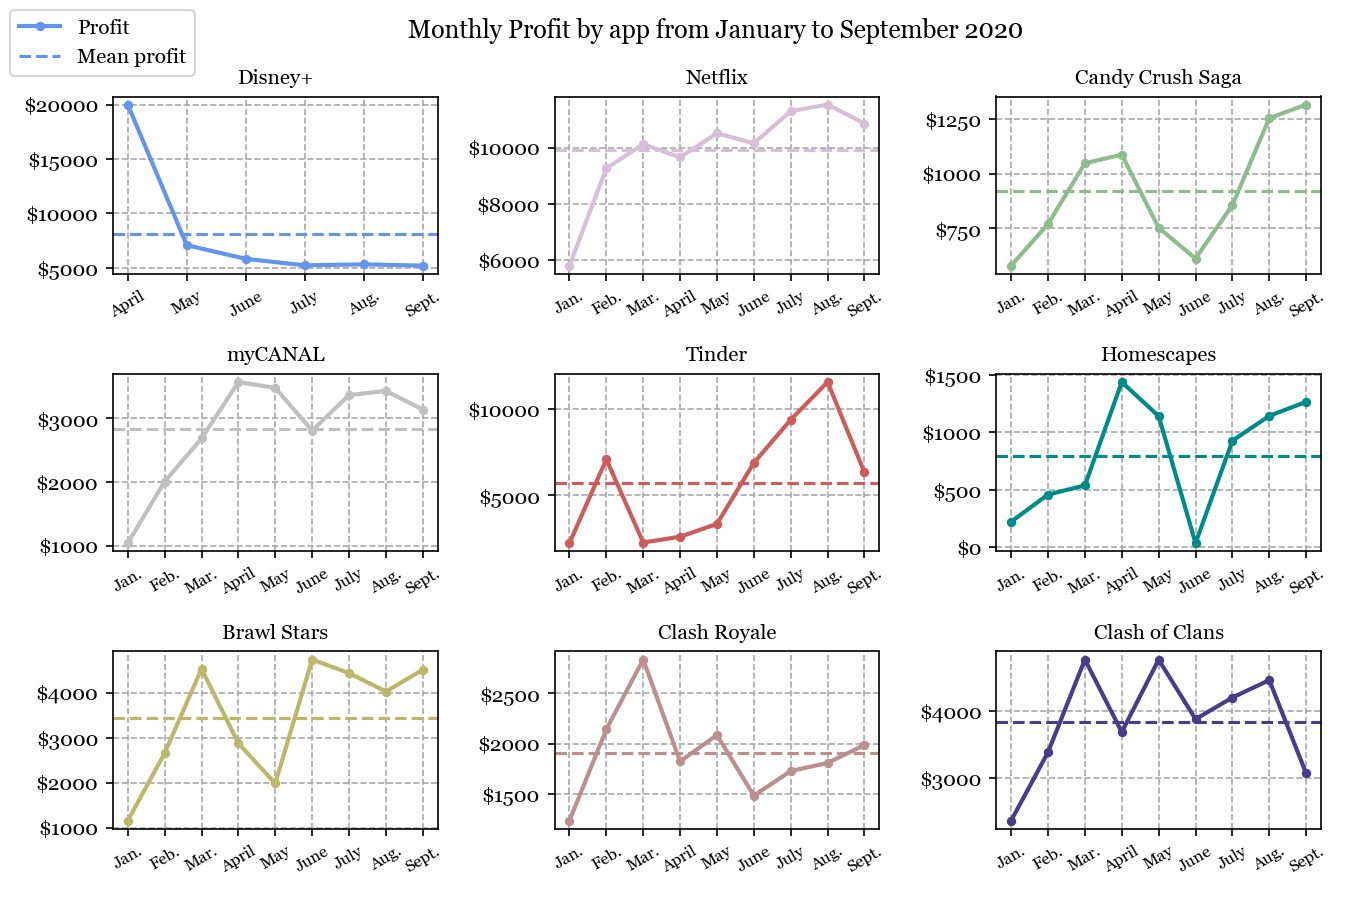

In [530]:
#Plot of monthly profit by app

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (9, 6))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle("Monthly Profit by app from January to September 2020", fontsize = 12, x=0.53)

#Plotting subplots

df_monthly_revenue = df.groupby(['title','year','month']).agg({'order_total_paid': ['sum']})
df_monthly_revenue = df_monthly_revenue.reset_index()

plot_monthly_revenue('Disney+', 'cornflowerblue', df_monthly_revenue, 1)
plot_monthly_revenue('Netflix', 'thistle', df_monthly_revenue, 2)
plot_monthly_revenue('Candy Crush Saga', 'darkseagreen', df_monthly_revenue, 3)     
plot_monthly_revenue('myCANAL', 'silver', df_monthly_revenue, 4)     
plot_monthly_revenue('Tinder', 'indianred', df_monthly_revenue, 5)
plot_monthly_revenue('Homescapes', 'darkcyan', df_monthly_revenue, 6)
plot_monthly_revenue('Brawl Stars', 'darkkhaki', df_monthly_revenue, 7)
plot_monthly_revenue('Clash Royale', 'rosybrown', df_monthly_revenue, 8)
plot_monthly_revenue('Clash of Clans', 'darkslateblue', df_monthly_revenue, 9)

ax.set_xlabel("")
plt.tight_layout()
handles = ['Profit', 'Mean profit']
fig.legend(handles, loc='upper left')

plt.grid(color = 'darkgrey', ls='dashed')

plt.show()
plt.savefig('graphics/monthly profit 2020.png')


In [520]:
#Dataframe with total profit obtained with each feature

df_features = df.groupby(['title','product_name']).agg({'order_total_paid': ['sum']})
df_features = df_features.reset_index()
display(df_features.head(5))

,title,product_name,order_total_paid
,,,sum
0,Brawl Stars,170 gemmes,7286.37
1,Brawl Stars,2000 gemmes,3189.71
2,Brawl Stars,30 gemmes,812.95
3,Brawl Stars,360 gemmes,4529.94
4,Brawl Stars,80 gemmes,1959.93


In [582]:
#The function profitable_features obtains a dataframe with the 5 most profitable features in %
#and the sum of these percentages
#inputs: product_name, the product name column
#df_features, dataframe obtained above
#Output: dataframe and percentage of the 5 most profitable features of a product.

def profitable_features(product_name,df_features):

    df_featuresDummy = df_features[df_features['title'] == product_name].copy()
    total_revenue = sum(df_featuresDummy['order_total_paid','sum'])

    feature_profit = list(df_featuresDummy['order_total_paid','sum'])

    profit_percentage = [x / total_revenue for x in feature_profit]

    df_featuresDummy['Profit percentage'] = profit_percentage
    df_featuresDummy = df_featuresDummy.set_index('product_name')
    
    most_profitable_features = pd.DataFrame(df_featuresDummy['Profit percentage'].nlargest(5, keep='last')) 
    #obtain the 5 most profitable features in a dataframe, if wanted another sample, change the 5 in the line above 

    most_profitable_features = most_profitable_features.reset_index()
    sum_profit = sum(most_profitable_features['Profit percentage'])
 
    return(most_profitable_features,sum_profit)

features_candy = profitable_features('Candy Crush Saga',df_features)
display(features_candy)

(            product_name  Profit percentage
 0      extra small offer           0.199760
 1  offer of 10 gold bars           0.173324
 2  offer of 50 gold bars           0.172825
 3                  offer           0.150161
 4            small offer           0.144286,
 0.8403553676940873)

In [583]:
features_candy = profitable_features('Candy Crush Saga',df_features)
features_clash = profitable_features('Clash Royale',df_features)
features_clans = profitable_features('Clash of Clans',df_features)
features_disney = profitable_features('Disney+',df_features)
features_homescapes = profitable_features('Homescapes',df_features)
features_netflix = profitable_features('Netflix',df_features)
features_tinder = profitable_features('Tinder',df_features)
features_mycanal = profitable_features('myCANAL',df_features) 
features_brawl = profitable_features('Brawl Stars',df_features) 

<IPython.core.display.Javascript object>


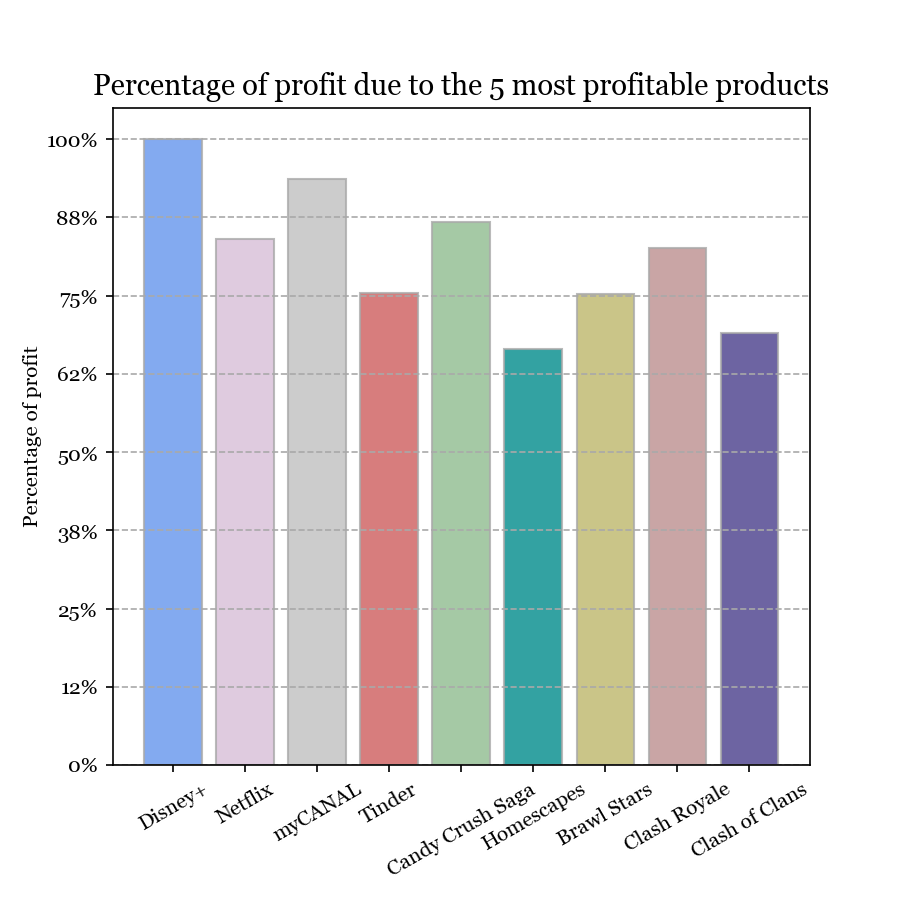

In [584]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib notebook

#Graphic of % of annual profit due to 5 most profitable features

features_companies = [features_disney[1],features_candy[1],features_clash[1],
                        features_clans[1],features_homescapes[1],features_brawl[1],
                        features_netflix[1],features_tinder[1],features_mycanal[1]]
features_companies = [x*100 for x in features_companies]

companies = ['Disney+','Netflix','myCANAL','Tinder','Candy Crush Saga','Homescapes','Brawl Stars','Clash Royale','Clash of Clans']

fig, ax = plt.subplots(figsize = (6, 6))

y_pos = np.arange(len(companies))
x_pos = [0.0,12.5,25.0,37.5,50.0,62.5,75.0,87.5,100.0]

plt.bar(y_pos, features_companies, color = ['cornflowerblue','thistle','silver','indianred','darkseagreen',
'darkcyan','darkkhaki','rosybrown','darkslateblue'],edgecolor = 'darkgrey', alpha = 0.8)

plt.title('Percentage of profit due to the 5 most profitable products', fontsize=14)
plt.xticks(y_pos, companies, rotation = 30, fontsize = '10')
plt.yticks(x_pos, companies, color = 'black', fontsize = '10')
plt.grid(axis = 'y', color = 'darkgrey', ls='dashed')

ax.yaxis.set_major_formatter('%{x:2.0f}')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Percentage of profit', color = 'black', fontsize = '10', labelpad = 2)
plt.subplots_adjust(bottom = 0.15) 

plt.show()
plt.savefig('graphics/percentage of profit 2020.png')

In [585]:
#Most occurences of features for each product

df_features = df.groupby(['title','product_name']).agg({'order_total_paid': ['sum']})
df_features = df_features.reset_index()

df_features_month = df.groupby(['title','month','product_name']).agg({'order_total_paid': ['sum']})
df_features_month = df_features_month.reset_index()

In [586]:
#The function df_percentage_profit obtains a dataframe with the a column with total % of profit
#for all features from a company
#inputs: product_name, the product name column
#df_features, dataframe obtained above
#Output: dataframe with a column for the percentage of 5 most profitable features of a product.

def df_percentage_profit(product_name,df_features,df_features_month):
        
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    df_features_month = df_features_month[df_features_month['title'] == product_name].copy()
    total_revenue = sum(df_features_month['order_total_paid','sum'])

    feature_profit = list(df_features_month['order_total_paid','sum'])
    profit_percentage = [x / total_revenue*100 for x in feature_profit]
    df_features_month['Profit percentage'] = profit_percentage

    result = pd.merge(df_features,df_features_month,how='inner',on='product_name')
    
    result = result.drop('title_y',axis=1,level=0)   #warning here
    result.rename(columns = {'order_total_paid_y':'Profit(month)','order_total_paid_x':'Profit(year)','title_x':'Company'}, inplace=True)
    result.columns = result.columns.droplevel(level=1) #warning here
    
    features = profitable_features(product_name,df_features)[0]
    
    df_percentages_month = pd.merge(features,result,how='inner',on='product_name')
    df_percentages_month = df_percentages_month.drop(columns=['Profit percentage_x','Profit(year)','Profit(month)'])
    df_percentages_month.rename(columns = {'Profit percentage_y':'Profit percentage'}, inplace=True)

    return(df_percentages_month)

In [587]:
df_disney = df_percentage_profit('Disney+',df_features,df_features_month)
df_mycanal = df_percentage_profit('myCANAL',df_features,df_features_month)
df_tinder = df_percentage_profit('Tinder',df_features,df_features_month)
df_candy = df_percentage_profit('Candy Crush Saga',df_features,df_features_month)
df_homescapes = df_percentage_profit('Homescapes',df_features,df_features_month)
df_brawl = df_percentage_profit('Brawl Stars',df_features,df_features_month)
df_clash = df_percentage_profit('Clash Royale',df_features,df_features_month)
df_clans = df_percentage_profit('Clash of Clans',df_features,df_features_month)
df_netflix = df_percentage_profit('Netflix',df_features,df_features_month)

display(df_brawl.head(5))

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,product_name,Company,month,Profit percentage
0,170 gemmes,Brawl Stars,1,0.676376
1,170 gemmes,Brawl Stars,2,0.925567
2,170 gemmes,Brawl Stars,3,1.388351
3,170 gemmes,Brawl Stars,4,0.996765
4,170 gemmes,Brawl Stars,5,2.135924


In [588]:
#The plot_profit_percentage_variation plots the profit variation from the 5 most profitable features of a product
#inputs: product_name, line_color, dataframe df, index of the subplot
#Output: subplot of the variation of profit from the 5 most profitable features of a product.

def plot_profit_percentage_variation(product_name, line_color, df, index):
    
    ax = plt.subplot(3, 3, index) 
    products = pd.unique(df['product_name'])
    
    if(product_name == 'Disney+'):
        months_names = ['April','May','June','July','Aug.','Sept.'] 
    else:
        months_names = ['Jan.','Feb.','Mar.','April','May','June','July','Aug.','Sept.']
        
    for product in products:      
        months = df[(df['product_name'] == product)]['month']
        percentage = df[(df['product_name'] == product)]['Profit percentage']
        plt.plot(months, percentage, line_color, linewidth=2, marker='.', markersize=7)
  
    plt.title(product_name, fontsize=10)
    if(product_name == 'Disney+'):
        x_pos=np.arange(4,10)
    else:
        x_pos=np.arange(1,10)
    plt.xticks(x_pos,months_names,color = 'black', fontsize = '8')
    ax.yaxis.set_major_formatter('%{x:1.0f}')
    ax.legend(labels=products, prop={'size':7}, loc='best')
    plt.grid(color = 'darkgrey', ls='dashed')

<IPython.core.display.Javascript object>


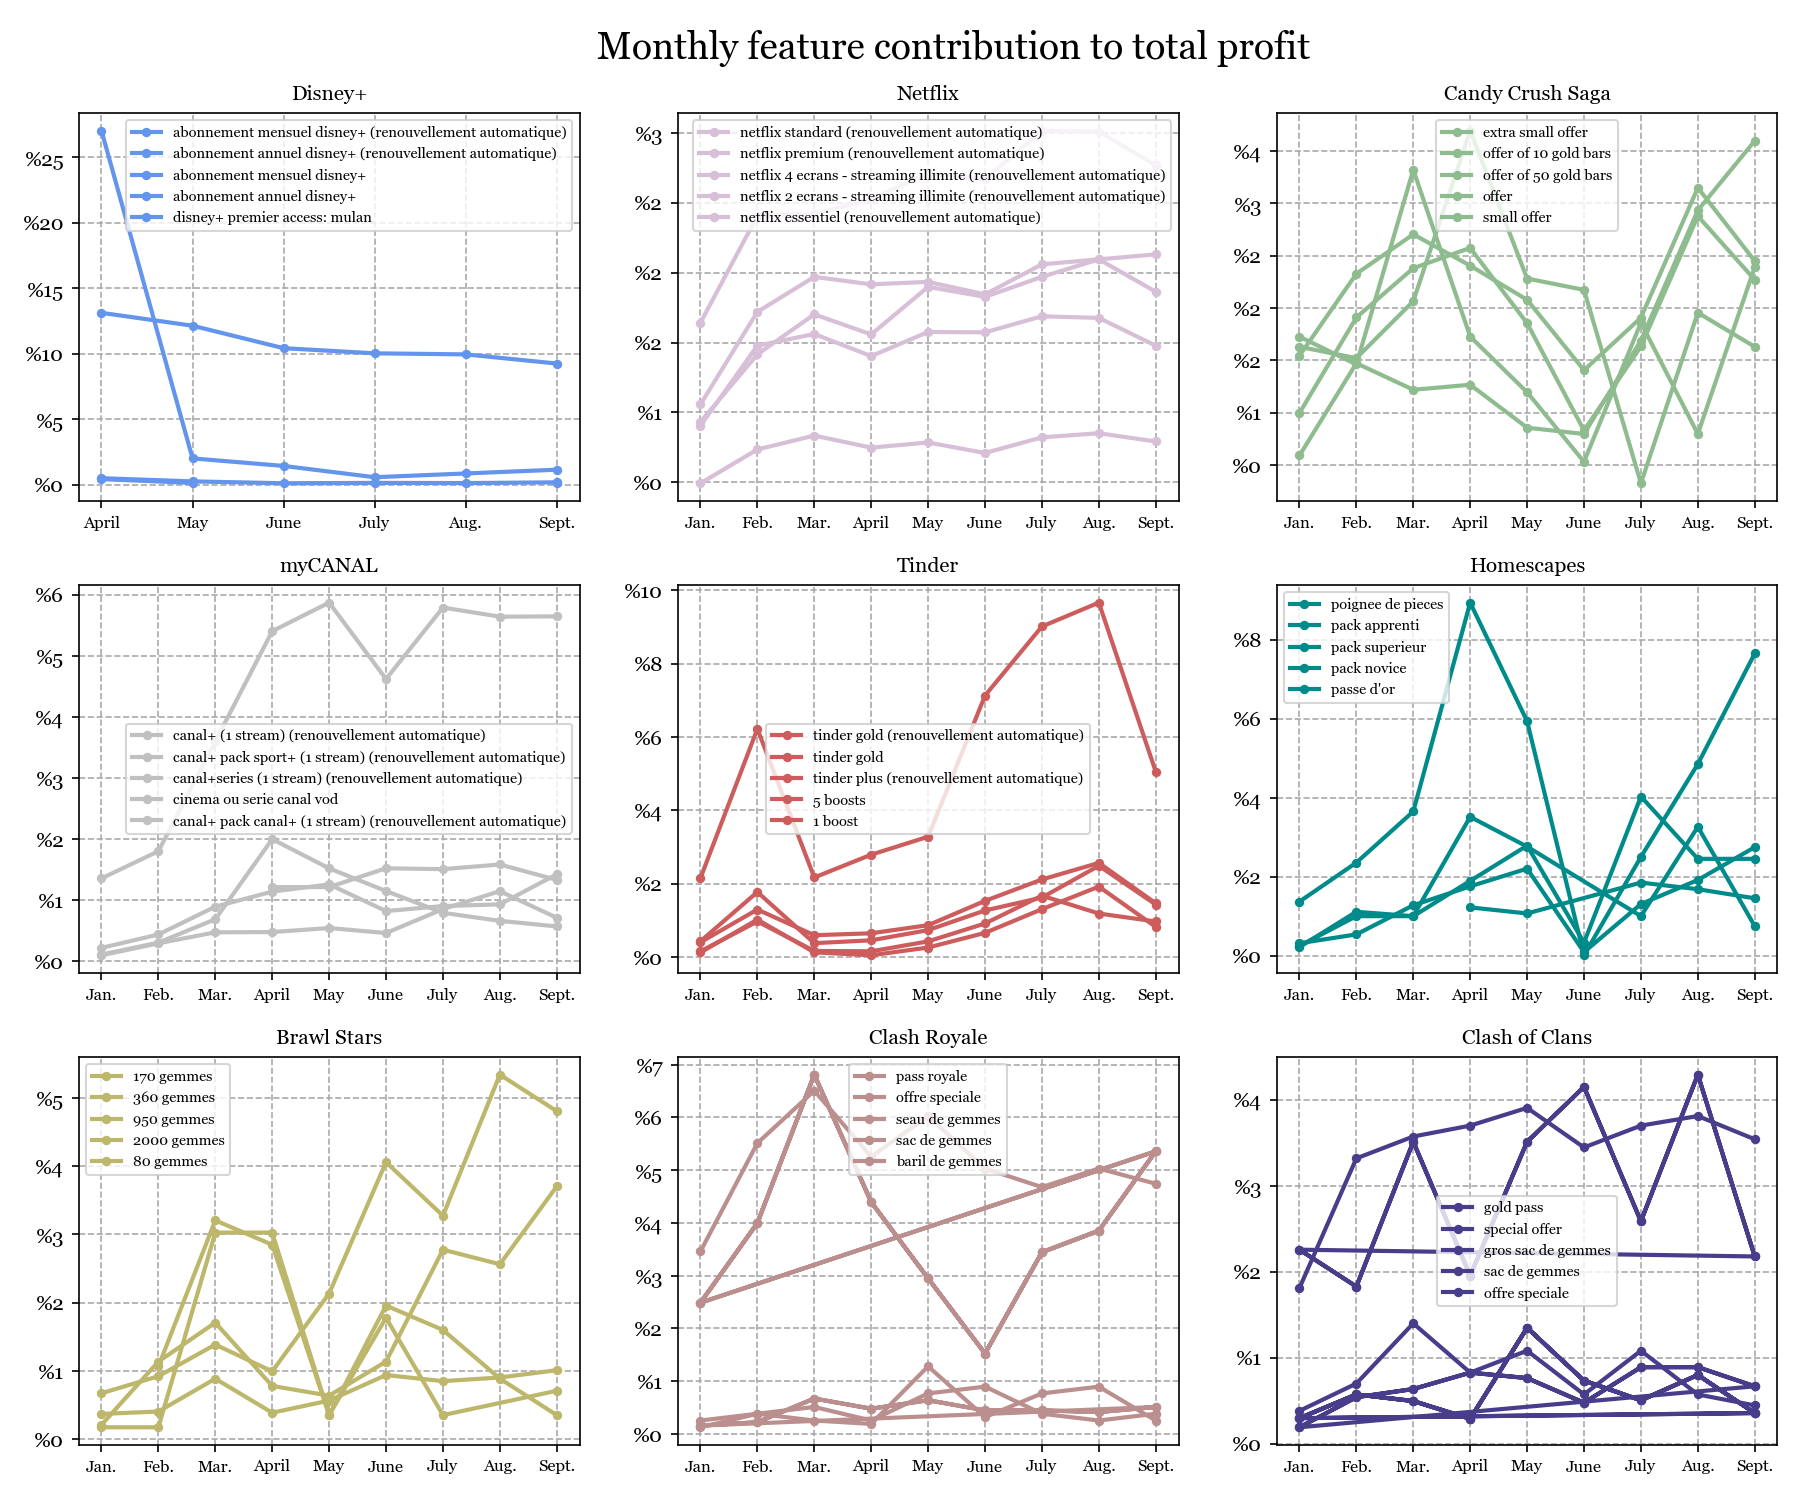

In [589]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 10))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle("Monthly feature contribution to total profit", fontsize = 18, x=0.53)

plot_profit_percentage_variation('Disney+', 'cornflowerblue', df_disney, 1)
plot_profit_percentage_variation('Netflix', 'thistle', df_netflix, 2)
plot_profit_percentage_variation('Candy Crush Saga', 'darkseagreen', df_candy, 3)     
plot_profit_percentage_variation('myCANAL', 'silver', df_mycanal, 4)     
plot_profit_percentage_variation('Tinder', 'indianred', df_tinder, 5)
plot_profit_percentage_variation('Homescapes', 'darkcyan', df_homescapes, 6)
plot_profit_percentage_variation('Brawl Stars', 'darkkhaki', df_brawl, 7)
plot_profit_percentage_variation('Clash Royale', 'rosybrown', df_clash, 8)
plot_profit_percentage_variation('Clash of Clans', 'darkslateblue', df_clans, 9)

plt.tight_layout()
plt.show()
plt.savefig('graphics/monthly profit variation 2020.png')
